In [ ]:
!chmod 600 ~/.passwd-s3fs

In [ ]:
!apt install s3fs

In [ ]:
!mkdir /content/s3
!s3fs um2ii-datasets /content/s3

In [ ]:
import pandas as pd
from fastai.vision.all import *
from sklearn.model_selection import train_test_split
import os
from glob import glob
from sklearn import metrics

MIMIC Race Validation on PadChest Dataset

In [ ]:
test_df = pd.read_csv('/content/s3/PadChest_Full_Dataset/Docs/PADCHEST_chest_x_ray_images_labels_160K_01.02.19.csv')
test_df['Path'] = 'content/s3/PadChest_Full_Dataset/' + test_df['ImageDir'].astype(str) + '/' + test_df['ImageID'].astype(str)
#Isolate only frontal view CXRs
print(test_df['Projection'].unique())
ap_df = test_df[test_df['Projection']=='AP']
pa_df = test_df[test_df['Projection']=='PA']
ap_hor_df = test_df[test_df['Projection']=='AP_horizontal']
test_df = pd.concat([ap_df, pa_df, ap_hor_df], ignore_index=True)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


['AP' 'AP_horizontal' 'COSTAL' 'EXCLUDE' 'L' 'PA']


In [ ]:
test_df = test_df.loc[test_df['Path'] != 'content/s3/PadChest_Full_Dataset/42/216840111366964013076187734852011291090445391_00-196-188.png']
test_df = test_df.loc[test_df['Path'] != 'content/s3/PadChest_Full_Dataset/44/216840111366964012373310883942009170084120009_00-097-074.png']
test_df = test_df.loc[test_df['Path'] != 'content/s3/PadChest_Full_Dataset/44/216840111366964012373310883942009180082307973_00-097-011.png']
test_df = test_df.loc[test_df['Path'] != 'content/s3/PadChest_Full_Dataset/48/216840111366964012819207061112010306085429121_04-020-102.png']
test_df = test_df.loc[test_df['Path'] != 'content/s3/PadChest_Full_Dataset/16/216840111366964013649110343042013092101343018_02-075-146.png']
test_df = test_df.loc[test_df['Path'] != 'content/s3/PadChest_Full_Dataset/17/216840111366964013590140476722013049100117076_02-063-097.png']
test_df = test_df.loc[test_df['Path'] != 'content/s3/PadChest_Full_Dataset/42/216840111366964012373310883942009117084022290_00-064-025.png']
test_df = test_df.loc[test_df['Path'] != 'content/s3/PadChest_Full_Dataset/43/216840111366964012283393834152009033140208626_00-059-118.png']
test_df = test_df.loc[test_df['Path'] != 'content/s3/PadChest_Full_Dataset/43/216840111366964012283393834152009033102258826_00-059-087.png']
test_df = test_df.loc[test_df['Path'] != 'content/s3/PadChest_Full_Dataset/49/216840111366964012819207061112010315104455352_04-024-184.png']
test_df = test_df.loc[test_df['Path'] != 'content/s3/PadChest_Full_Dataset/13/216840111366964013686042548532013208193054515_02-026-007.png']
test_df = test_df.loc[test_df['Path'] != 'content/s3/PadChest_Full_Dataset/13/216840111366964013590140476722013058110301622_02-056-111.png']
test_df = test_df.loc[test_df['Path'] != 'content/s3/PadChest_Full_Dataset/17/216840111366964013590140476722013043111952381_02-065-198.png']
test_df = test_df.loc[test_df['Path'] != 'content/s3/PadChest_Full_Dataset/19/216840111366964013829543166512013353113303615_02-092-190.png']
test_df = test_df.loc[test_df['Path'] != 'content/s3/PadChest_Full_Dataset/20/216840111366964013962490064942014134093945580_01-178-104.png']
test_df = test_df.loc[test_df['Path'] != 'content/s3/PadChest_Full_Dataset/41/216840111366964012989926673512011151082430686_00-157-045.png']
test_df = test_df.loc[test_df['Path'] != 'content/s3/PadChest_Full_Dataset/43/216840111366964012339356563862009072111404053_00-043-192.png']
test_df = test_df.loc[test_df['Path'] != 'content/s3/PadChest_Full_Dataset/43/216840111366964012487858717522009280135853083_00-075-001.png']
test_df = test_df.loc[test_df['Path'] != 'content/s3/PadChest_Full_Dataset/44/216840111366964012819207061112010281134410801_00-129-131.png']
test_df = test_df.loc[test_df['Path'] != 'content/s3/PadChest_Full_Dataset/46/216840111366964012989926673512011074122523403_00-163-058.png']
test_df = test_df.loc[test_df['Path'] != 'content/s3/PadChest_Full_Dataset/46/216840111366964012558082906712009327122220177_00-102-064.png']
test_df = test_df.loc[test_df['Path'] != 'content/s3/PadChest_Full_Dataset/46/216840111366964012373310883942009152114636712_00-102-045.png']
test_df = test_df.loc[test_df['Path'] != 'content/s3/PadChest_Full_Dataset/46/216840111366964012989926673512011083134050913_00-168-009.png']
test_df = test_df.loc[test_df['Path'] != 'content/s3/PadChest_Full_Dataset/47/216840111366964012959786098432011033083840143_00-176-115.png']
test_df = test_df.loc[test_df['Path'] != 'content/s3/PadChest_Full_Dataset/49/216840111366964012819207061112010307142602253_04-014-084.png']
test_df = test_df.loc[test_df['Path'] != 'content/s3/PadChest_Full_Dataset/18/216840111366964013590140476722013028161046120_02-015-149.png']
test_df = test_df.loc[test_df['Path'] != 'content/s3/PadChest_Full_Dataset/41/216840111366964012989926673512011132200139442_00-157-099.png']
test_df = test_df.loc[test_df['Path'] != 'content/s3/PadChest_Full_Dataset/43/216840111366964012989926673512011101154138555_00-191-086.png']
test_df = test_df.loc[test_df['Path'] != 'content/s3/PadChest_Full_Dataset/43/216840111366964012558082906712009301143450268_00-075-157.png']
test_df = test_df.loc[test_df['Path'] != 'content/s3/PadChest_Full_Dataset/45/216840111366964012339356563862009068084200743_00-045-105.png']
test_df = test_df.loc[test_df['Path'] != 'content/s3/PadChest_Full_Dataset/45/216840111366964012558082906712009300162151055_00-078-079.png']
test_df = test_df.loc[test_df['Path'] != 'content/s3/PadChest_Full_Dataset/47/216840111366964013076187734852011178154626671_00-145-086.png']
test_df = test_df.loc[test_df['Path'] != 'content/s3/PadChest_Full_Dataset/48/216840111366964013076187734852011287092959219_00-195-171.png']
test_df.shape

(110614, 37)

In [ ]:
mimic_race_model = load_learner('/content/mimic_race.pkl')
mimic_race_model.dls.to(device='cuda')
mimic_race_model.model.to(device='cuda')
race_test_dl = mimic_race_model.dls.test_dl(test_df)
race_preds = mimic_race_model.get_preds(dl=race_test_dl, with_decoded=True)
mimic_race_model.dls.vocab

['Asian', 'Black', 'Hispanic/Latino', 'Other', 'White']

[0. 0. 0. 0. 1.]


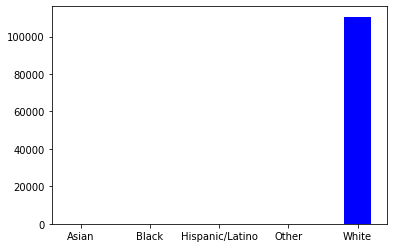

In [ ]:
race_labels = mimic_race_model.dls.vocab.o2i.keys()
prediction_counts = [race_preds[2].tolist().count(0), race_preds[2].tolist().count(1), race_preds[2].tolist().count(2), race_preds[2].tolist().count(3), race_preds[2].tolist().count(4)]
plt.bar(race_labels, prediction_counts, color ='blue',
        width = 0.4)
print(np.array(prediction_counts)/len(race_preds[2]))

In [ ]:
test_df.insert(len(test_df.columns), 'Race/Ethnicity_Tensor_Id', race_preds[2].numpy())
test_df.insert(len(test_df.columns), 'Race/Ethnicity_Probability', race_preds[0].numpy().tolist())
print(test_df)
test_df.to_csv('/content/sample_data/mimic_race_padchest_test.csv')

        Unnamed: 0  \
0                0   
1                1   
2                2   
3                3   
4                4   
...            ...   
110609       18900   
110610       18901   
110611       18902   
110612       18903   
110613       18904   

                                                                   ImageID  \
0                       313903302629300007485735352869488750471_75sg0k.png   
1                       172548964592157267755522496623963445785_3moi59.png   
2                       144238093861007575291420728879881361908_ajle4j.png   
3                        36034963984131922178434446816145605448_3lh821.png   
4                       155848149910446291725998642481087011204_ycbfzg.png   
...                                                                    ...   
110609        216840111366964012819207061112010320125255984_04-013-018.png   
110610        216840111366964012819207061112010320084826641_04-013-131.png   
110611        2168401113669640129

CheXpert Race v2 Validation on PadChest Dataset

In [ ]:
test_df = pd.read_csv('/content/s3/PadChest_Full_Dataset/Docs/PADCHEST_chest_x_ray_images_labels_160K_01.02.19.csv')
test_df['Path'] = 's3/PadChest_Full_Dataset/' + test_df['ImageDir'].astype(str) + '/' + test_df['ImageID'].astype(str)
#Isolate only frontal view CXRs
print(test_df['Projection'].unique())
ap_df = test_df[test_df['Projection']=='AP']
pa_df = test_df[test_df['Projection']=='PA']
ap_hor_df = test_df[test_df['Projection']=='AP_horizontal']
test_df = pd.concat([ap_df, pa_df, ap_hor_df], ignore_index=True)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


['AP' 'AP_horizontal' 'COSTAL' 'EXCLUDE' 'L' 'PA']


In [ ]:
test_df = test_df.loc[test_df['Path'] != 's3/PadChest_Full_Dataset/42/216840111366964013076187734852011291090445391_00-196-188.png']
test_df = test_df.loc[test_df['Path'] != 's3/PadChest_Full_Dataset/44/216840111366964012373310883942009170084120009_00-097-074.png']
test_df = test_df.loc[test_df['Path'] != 's3/PadChest_Full_Dataset/44/216840111366964012373310883942009180082307973_00-097-011.png']
test_df = test_df.loc[test_df['Path'] != 's3/PadChest_Full_Dataset/48/216840111366964012819207061112010306085429121_04-020-102.png']
test_df = test_df.loc[test_df['Path'] != 's3/PadChest_Full_Dataset/16/216840111366964013649110343042013092101343018_02-075-146.png']
test_df = test_df.loc[test_df['Path'] != 's3/PadChest_Full_Dataset/17/216840111366964013590140476722013049100117076_02-063-097.png']
test_df = test_df.loc[test_df['Path'] != 's3/PadChest_Full_Dataset/42/216840111366964012373310883942009117084022290_00-064-025.png']
test_df = test_df.loc[test_df['Path'] != 's3/PadChest_Full_Dataset/43/216840111366964012283393834152009033140208626_00-059-118.png']
test_df = test_df.loc[test_df['Path'] != 's3/PadChest_Full_Dataset/43/216840111366964012283393834152009033102258826_00-059-087.png']
test_df = test_df.loc[test_df['Path'] != 's3/PadChest_Full_Dataset/49/216840111366964012819207061112010315104455352_04-024-184.png']
test_df = test_df.loc[test_df['Path'] != 's3/PadChest_Full_Dataset/13/216840111366964013686042548532013208193054515_02-026-007.png']
test_df = test_df.loc[test_df['Path'] != 's3/PadChest_Full_Dataset/13/216840111366964013590140476722013058110301622_02-056-111.png']
test_df = test_df.loc[test_df['Path'] != 's3/PadChest_Full_Dataset/17/216840111366964013590140476722013043111952381_02-065-198.png']
test_df = test_df.loc[test_df['Path'] != 's3/PadChest_Full_Dataset/19/216840111366964013829543166512013353113303615_02-092-190.png']
test_df = test_df.loc[test_df['Path'] != 's3/PadChest_Full_Dataset/20/216840111366964013962490064942014134093945580_01-178-104.png']
test_df = test_df.loc[test_df['Path'] != 's3/PadChest_Full_Dataset/41/216840111366964012989926673512011151082430686_00-157-045.png']
test_df = test_df.loc[test_df['Path'] != 's3/PadChest_Full_Dataset/43/216840111366964012339356563862009072111404053_00-043-192.png']
test_df = test_df.loc[test_df['Path'] != 's3/PadChest_Full_Dataset/43/216840111366964012487858717522009280135853083_00-075-001.png']
test_df = test_df.loc[test_df['Path'] != 's3/PadChest_Full_Dataset/44/216840111366964012819207061112010281134410801_00-129-131.png']
test_df = test_df.loc[test_df['Path'] != 's3/PadChest_Full_Dataset/46/216840111366964012989926673512011074122523403_00-163-058.png']
test_df = test_df.loc[test_df['Path'] != 's3/PadChest_Full_Dataset/46/216840111366964012558082906712009327122220177_00-102-064.png']
test_df = test_df.loc[test_df['Path'] != 's3/PadChest_Full_Dataset/46/216840111366964012373310883942009152114636712_00-102-045.png']
test_df = test_df.loc[test_df['Path'] != 's3/PadChest_Full_Dataset/46/216840111366964012989926673512011083134050913_00-168-009.png']
test_df = test_df.loc[test_df['Path'] != 's3/PadChest_Full_Dataset/47/216840111366964012959786098432011033083840143_00-176-115.png']
test_df = test_df.loc[test_df['Path'] != 's3/PadChest_Full_Dataset/49/216840111366964012819207061112010307142602253_04-014-084.png']
test_df = test_df.loc[test_df['Path'] != 's3/PadChest_Full_Dataset/18/216840111366964013590140476722013028161046120_02-015-149.png']
test_df = test_df.loc[test_df['Path'] != 's3/PadChest_Full_Dataset/41/216840111366964012989926673512011132200139442_00-157-099.png']
test_df = test_df.loc[test_df['Path'] != 's3/PadChest_Full_Dataset/43/216840111366964012989926673512011101154138555_00-191-086.png']
test_df = test_df.loc[test_df['Path'] != 's3/PadChest_Full_Dataset/43/216840111366964012558082906712009301143450268_00-075-157.png']
test_df = test_df.loc[test_df['Path'] != 's3/PadChest_Full_Dataset/45/216840111366964012339356563862009068084200743_00-045-105.png']
test_df = test_df.loc[test_df['Path'] != 's3/PadChest_Full_Dataset/45/216840111366964012558082906712009300162151055_00-078-079.png']
test_df = test_df.loc[test_df['Path'] != 's3/PadChest_Full_Dataset/47/216840111366964013076187734852011178154626671_00-145-086.png']
test_df = test_df.loc[test_df['Path'] != 's3/PadChest_Full_Dataset/48/216840111366964013076187734852011287092959219_00-195-171.png']
test_df.shape

(110614, 37)

In [ ]:
chexpert_race2_model = load_learner('/content/chexpert_race2.pkl')
chexpert_race2_model.dls.to(device='cuda')
chexpert_race2_model.model.to(device='cuda')
race_test_dl = chexpert_race2_model.dls.test_dl(test_df)
race_preds = chexpert_race2_model.get_preds(dl=race_test_dl, with_decoded=True)

In [ ]:
chexpert_race2_model.dls.vocab

['Hispanic/Latino', 'Non-Hispanic Asian', 'Non-Hispanic Black', 'Non-Hispanic White']

<BarContainer object of 4 artists>

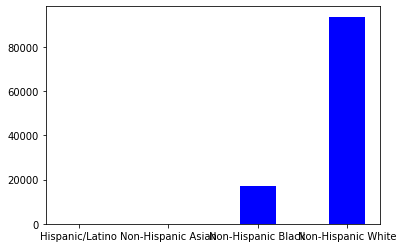

In [ ]:
race_labels = chexpert_race2_model.dls.vocab.o2i.keys()
prediction_counts = [race_preds[2].tolist().count(0), race_preds[2].tolist().count(1), race_preds[2].tolist().count(2), race_preds[2].tolist().count(3)]
plt.bar(race_labels, prediction_counts, color ='blue',
        width = 0.4)

In [ ]:
test_df.insert(len(test_df.columns), 'Race/Ethnicity_Tensor_Id', race_preds[2].numpy())
test_df.insert(len(test_df.columns), 'Race/Ethnicity_Probability', race_preds[0].numpy().tolist())
print(test_df)
test_df.to_csv('/content/sample_data/chexpert_race2_padchest_test.csv')

        Unnamed: 0  \
0                0   
1                1   
2                2   
3                3   
4                4   
...            ...   
110609       18900   
110610       18901   
110611       18902   
110612       18903   
110613       18904   

                                                                   ImageID  \
0                       313903302629300007485735352869488750471_75sg0k.png   
1                       172548964592157267755522496623963445785_3moi59.png   
2                       144238093861007575291420728879881361908_ajle4j.png   
3                        36034963984131922178434446816145605448_3lh821.png   
4                       155848149910446291725998642481087011204_ycbfzg.png   
...                                                                    ...   
110609        216840111366964012819207061112010320125255984_04-013-018.png   
110610        216840111366964012819207061112010320084826641_04-013-131.png   
110611        2168401113669640129